In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast


In [30]:
# leer archivo
with open("halos_history.txt", "r") as f:
    lines = f.readlines()

rows = []
for line in lines:
    parts = line.strip().split("], [")
    ids = ast.literal_eval(parts[0] + "]")
    snaps = ast.literal_eval("[" + parts[1])
    
    # emparejar id con su snap
    for halo_id, snap in zip(ids, snaps):
        rows.append({"halo_id": halo_id, "snap": snap})

# convertir a DataFrame
history = pd.DataFrame(rows)

history.head(10)


,halo_id,snap
0,0,99
1,0,67
2,1,50
3,0,40
4,0,33
5,2,25
6,0,21
7,1,99
8,1,67
9,3,50


In [33]:
#buscar el halo con id 114088 en z=0
history[(history['halo_id']==114088) & (history['snap']==50)]

,halo_id,snap
346855,114088,50


In [3]:
history.tail(11)

,halo_id,snap
466181,110872,99
466182,130918,67
466183,110873,99
466184,110874,99
466185,110875,99
466186,110876,99
466187,110877,99
466188,110878,99
466189,124398,99
466190,110880,99


In [4]:
halo3_z0 = pd.read_csv('../../results/Halos_50_3_z0.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_z0d5 = pd.read_csv('../../results/Halos_50_3_z0d5.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_z1 = pd.read_csv('../../results/Halos_50_3_z1.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_z1d5 = pd.read_csv('../../results/Halos_50_3_z1d5.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_z2 = pd.read_csv('../../results/Halos_50_3_z2.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_z3 = pd.read_csv('../../results/Halos_50_3_z3.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_z4 = pd.read_csv('../../results/Halos_50_3_z4.dat', delim_whitespace=True, header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])

#quitar de halo4_z0 las filas donde Mdom es 0

# halo3_z0 = halo3_z0[halo3_z0['Mdom'] > 0]
# halo3_z0d5 = halo3_z0d5[halo3_z0d5['Mdom'] > 0]
# halo3_z1 = halo3_z1[halo3_z1['Mdom'] > 0]
# halo3_z1d5 = halo3_z1d5[halo3_z1d5['Mdom'] > 0]
# halo3_z2 = halo3_z2[halo3_z2['Mdom'] > 0]
# halo3_z3 = halo3_z3[halo3_z3['Mdom'] > 0]
# halo3_z4 = halo3_z4[halo3_z4['Mdom'] > 0]

In [5]:
halo3_z0.head()

,X,Y,Z,Mvir,Rvir,Mdom,Npart
0,7301.202637,24564.564453,21312.199219,15079.097656,1082.225708,14868.514825,6369211
1,23693.804688,15114.152344,3146.023193,7462.923340,856.034973,5440.241793,2330431
2,27097.136719,7563.982910,4060.166748,5181.124023,758.016785,3813.406095,1633545
3,15544.708984,29365.369141,26009.568359,3491.555176,664.569702,3095.055814,1325826
4,20926.933594,5167.427734,31056.812500,3239.478027,648.165588,2720.432544,1165349


In [6]:
halos = [halo3_z0, halo3_z0d5, halo3_z1, halo3_z1d5, halo3_z2, halo3_z3, halo3_z4]
len(halo3_z0),len(halo3_z0d5),len(halo3_z1),len(halo3_z1d5),len(halo3_z2),len(halo3_z3),len(halo3_z4)

(124399, 138392, 148352, 155217, 158795, 155437, 139188)

In [7]:
history.head(7)

,halo_id,snap
0,0,99
1,0,67
2,1,50
3,0,40
4,0,33
5,2,25
6,0,21


In [8]:
# función para convertir snap a z
def snap2z(snap):
    if snap == 99:
        return 0
    if snap == 67:
        return 0.5
    if snap == 50:
        return 1
    if snap == 40:
        return 1.5
    if snap == 33:
        return 2
    if snap == 25:
        return 3.01
    if snap == 21:
        return 4.01

In [9]:
def epoch(z):
    if z == 0:
        return 0
    if z == 0.5:
        return 1
    if z == 1:
        return 2
    if z == 1.5:
        return 3
    if z == 2:
        return 4
    if z == 3.01:
        return 5
    if z == 4.01:
        return 6 

In [10]:
history['z'] = history['snap'].apply(snap2z)
history['epoch'] = history['z'].apply(epoch)

In [11]:
history.head(7)

,halo_id,snap,z,epoch
0,0,99,0.00,0
1,0,67,0.50,1
2,1,50,1.00,2
3,0,40,1.50,3
4,0,33,2.00,4
5,2,25,3.01,5
6,0,21,4.01,6


In [12]:
history['halo_id'].iloc[3]

0

In [13]:
len(history)

466192

In [14]:
Mdomains = []
Mvirs = []
Rvirs = []

for i, snap in enumerate(history['snap']):
    id = int(history['halo_id'].iloc[i])

    #to get [halo3_z0, halo3_z0d5, halo3_z1, halo3_z1d5, halo3_z2, halo3_z3, halo3_z4] at some z
    epochs = history['epoch'].iloc[i]
    Halo = halos[epochs]

    mdom = Halo.iloc[id]['Mdom'] 
    mvir = Halo.iloc[id]['Mvir']
    rvir = Halo.iloc[id]['Rvir']

    Mdomains.append(mdom)
    Mvirs.append(mvir)
    Rvirs.append(rvir)

history['Mdom'] = Mdomains
history['Mvir'] = Mvirs
history['Rvir'] = Rvirs


In [15]:
len(Mdomains)

466192

In [16]:
history.head(12)

,halo_id,snap,z,epoch,Mdom,Mvir,Rvir
0,0,99,0.00,0,14868.514825,15079.097656,1082.225708
1,0,67,0.50,1,11816.643740,7356.986328,961.575439
2,1,50,1.00,2,6773.379776,4175.038086,831.712219
3,0,40,1.50,3,5495.054348,2296.211914,694.748718
4,0,33,2.00,4,6318.500934,1773.746460,643.600769
5,2,25,3.01,5,2983.742907,425.068085,402.965515
6,0,21,4.01,6,3799.287427,269.442932,347.179871
7,1,99,0.00,0,5440.241793,7462.923340,856.034973
8,1,67,0.50,1,5054.119092,4386.956055,809.356262
9,3,50,1.00,2,4266.426726,2615.140137,711.621094


,halo_id,snap,z,epoch,Mdom,Mvir,Rvir


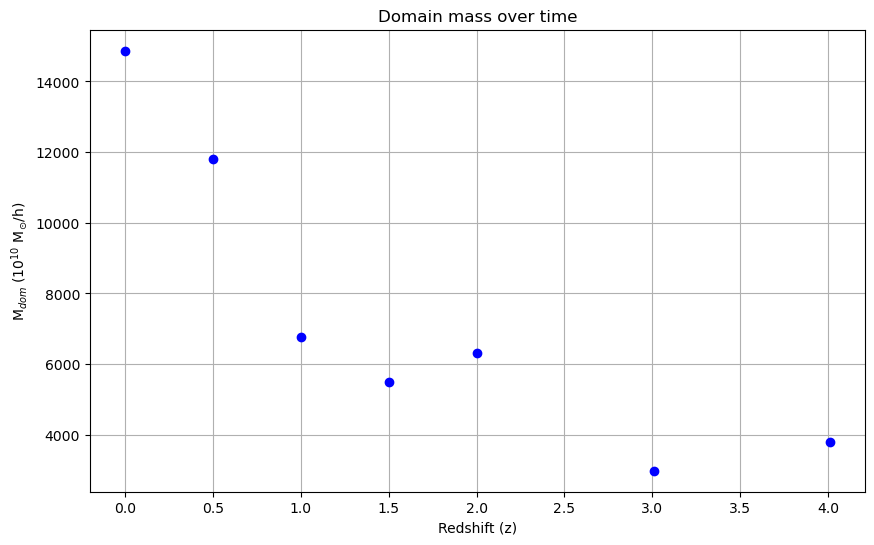

In [17]:
#Grafica de acreción de masa
fig = plt.figure(figsize=(10, 6))
plt.plot(history.iloc[0:7]['z'], history.iloc[0:7]['Mdom'],'o',color='b')
plt.xlabel('Redshift (z)')
plt.ylabel('M$_{dom}$ ($10^{10}$ M$_{\odot}$/h)')
plt.title('Domain mass over time')
plt.grid()
plt.show()

In [18]:
import matplotlib.pyplot as plt

In [19]:
len(history)

466192

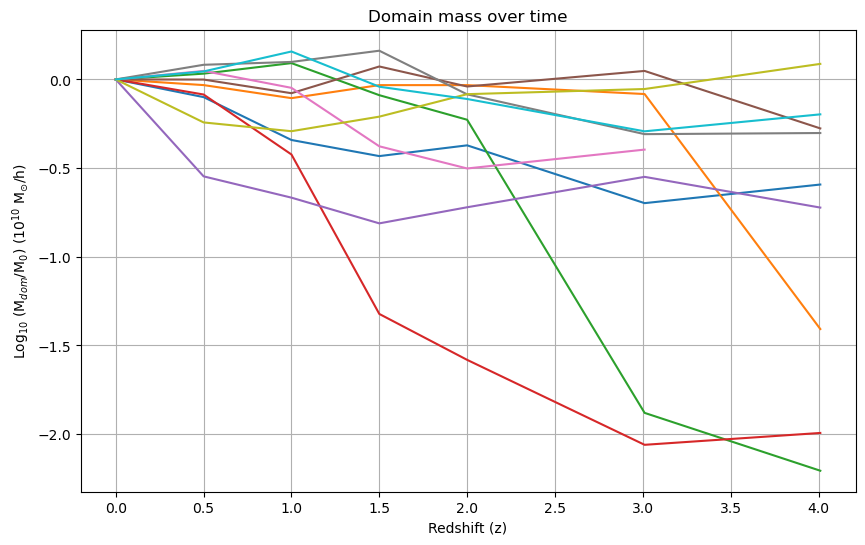

In [20]:
fig = plt.figure(figsize=(10, 6))
i = 0
zs = [0, 0.5, 1, 1.5, 2, 3.01, 4.01, 5.01]
hal = []
zsgraph = []

k = 0
while i < 70:

    if history.iloc[i]['z'] == zs[k]:
        if k == 0:
            M0 = history.iloc[i]['Mdom']
        hal.append(np.log10(history.iloc[i]['Mdom']/M0))
        zsgraph.append(history.iloc[i]['z'])
        i += 1
        k += 1
    else:
        plt.plot(zsgraph, hal)
        hal = []
        zsgraph = []
        k = 0
        i = i

plt.xlabel('Redshift (z)')
plt.ylabel('Log$_{10}$ (M$_{dom}$/M$_{0}$) ($10^{10}$ M$_{\odot}$/h)')
plt.title('Domain mass over time')
plt.grid()
plt.show()

In [21]:
import matplotlib.pyplot as plt

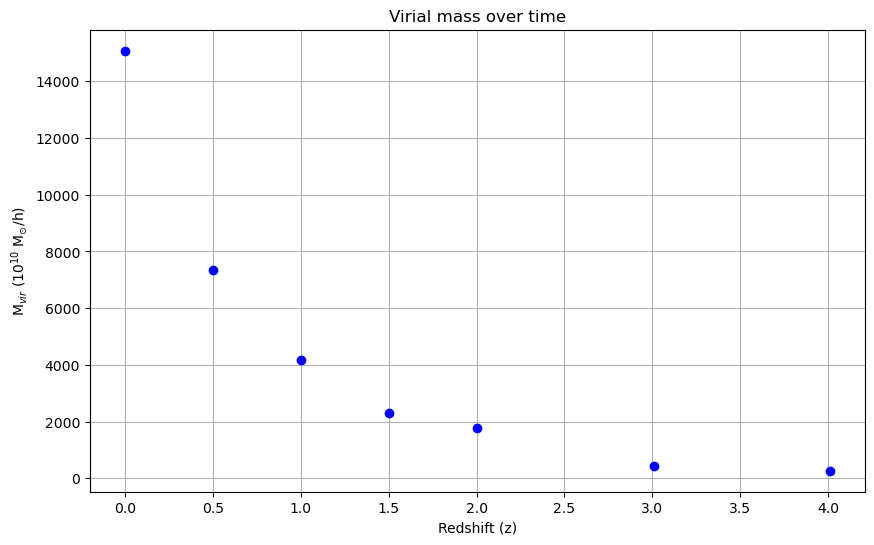

In [22]:
#Grafica de acreción de masa
fig = plt.figure(figsize=(10, 6))
plt.plot(history.iloc[0:7]['z'], history.iloc[0:7]['Mvir'],'o',color='b')
plt.xlabel('Redshift (z)')
plt.ylabel('M$_{vir}$ ($10^{10}$ M$_{\odot}$/h)')
plt.title('Virial mass over time')
plt.grid()
plt.show()

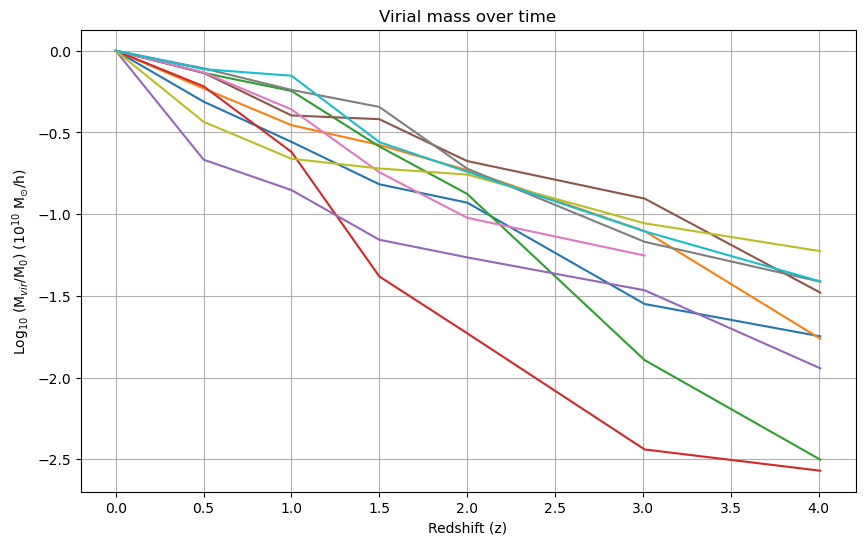

In [23]:
fig = plt.figure(figsize=(10, 6))
i = 0
zs = [0, 0.5, 1, 1.5, 2, 3.01, 4.01, 5.01]
hal = []
zsgraph = []

k = 0
while i < 70:

    if history.iloc[i]['z'] == zs[k]:
        if k == 0:
            M0 = history.iloc[i]['Mvir']
        hal.append(np.log10(history.iloc[i]['Mvir']/M0))
        zsgraph.append(history.iloc[i]['z'])
        i += 1
        k += 1
    else:
        plt.plot(zsgraph, hal)
        hal = []
        zsgraph = []
        k = 0
        i = i

plt.xlabel('Redshift (z)')
plt.ylabel('Log$_{10}$ (M$_{vir}$/M$_{0}$) ($10^{10}$ M$_{\odot}$/h)')
plt.title('Virial mass over time')
plt.grid()
plt.show()

In [24]:
#escribir un archivo csv con el dataframe history
history.to_csv('../../results/halos_history.csv', index=False)